In [79]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import sys
import copy
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 
from zipfile import ZipFile 

import tensorflow as tf
from tensorflow import keras
import sklearn

In [42]:
(X_train , Y_train) ,( X_test , Y_test) = keras.datasets.mnist.load_data()


In [43]:
 
X_train_f = X_train.reshape(len(X_train)   , 28*28 )
X_test_f = X_test.reshape(len(X_test)   , 28*28 )
X_train_f = X_train_f/255
X_test_f = X_test_f/255

  


In [44]:
model   =keras.Sequential([
    keras.layers.Dense(10 ,input_shape =(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics=['accuracy']
    
)

model.fit(X_train_f , Y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4843 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3051 - accuracy: 0.9162
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2850 - accuracy: 0.9217
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2749 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9262


the predicted number is =  6


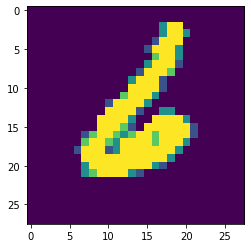

In [92]:
index =random.randint(0, len(X_test))
plt.imshow(X_test[index])
prediction = model.predict(X_test_f)

print('the predicted number is = ' ,np.argmax(prediction[index]) )
prediction_labels = [np.argmax(i) for i in prediction ]


In [46]:
cm = tf.math.confusion_matrix(labels=Y_test ,predictions=prediction_labels)
print(cm.shape)

(10, 10)


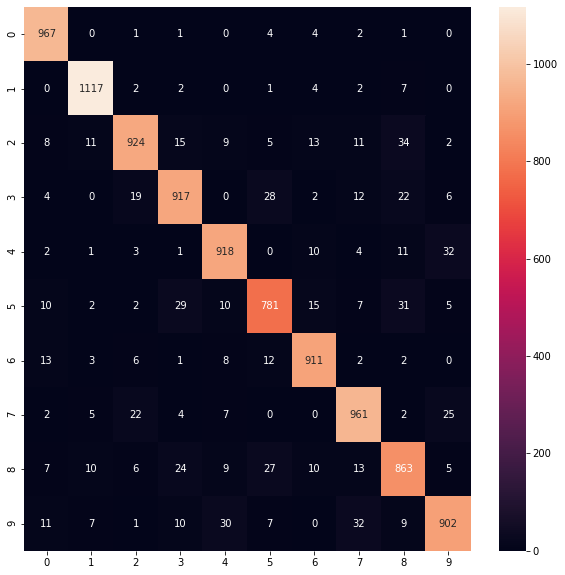

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(cm ,annot =True,fmt='d')
plt.xlabel ='predicted'
plt.ylabel ='truth'


In [133]:
model   =keras.Sequential([
    keras.layers.Dense(100 ,input_shape =(784,),activation='sigmoid'),
    keras.layers.Dense(10 ,activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid'),

])

model.compile(
    optimizer='adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics=['accuracy']
    
)

model.fit(X_train_f , Y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6317 - accuracy: 0.8102
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2229 - accuracy: 0.9378
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1619 - accuracy: 0.9542
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1267 - accuracy: 0.9647
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1034 - accuracy: 0.9710


In [73]:
model.evaluate(X_test_f , Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9707


[0.10531429201364517, 0.9707000255584717]

the predcited label is =  7


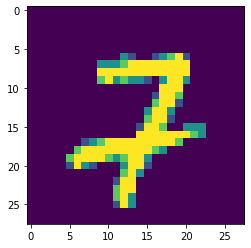

In [85]:
index =random.randint(0, len(X_test))
plt.imshow(X_test[index])
prediction = model.predict(X_test_f)
print('the predcited label is = ' , np.argmax(prediction[index]))
prediction_labels = [np.argmax(i) for i in prediction ]


In [75]:
cm  = tf.math.confusion_matrix(labels=Y_test , predictions=prediction_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    2,    0,    3,    4,    3,    2,    0],
       [   1, 1123,    4,    1,    0,    1,    1,    1,    3,    0],
       [   6,    3, 1003,    2,    0,    0,    2,   10,    6,    0],
       [   0,    1,    3,  989,    0,    2,    0,    8,    5,    2],
       [   3,    0,    4,    0,  937,    0,    9,    4,    3,   22],
       [   5,    1,    0,   11,    2,  860,    6,    2,    4,    1],
       [   7,    3,    2,    1,    3,    5,  933,    0,    4,    0],
       [   1,    6,   14,    1,    1,    0,    1,  998,    0,    6],
       [   5,    3,    2,    6,    3,    6,    2,    5,  941,    1],
       [   7,    8,    0,   10,    9,    4,    0,   10,    4,  957]])>

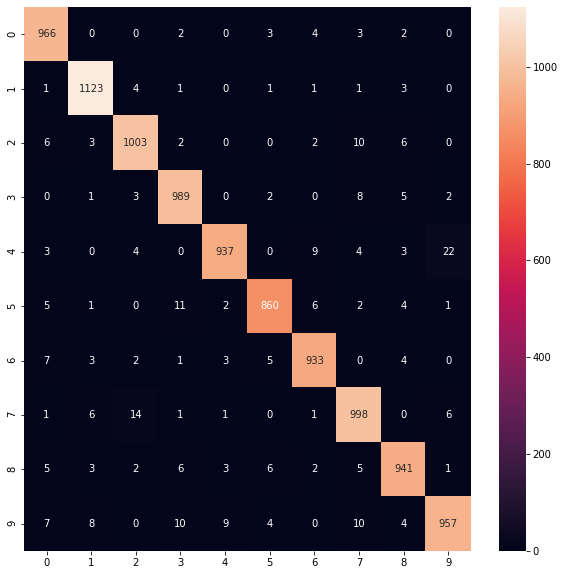

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel= 'predicted'
plt.ylabel= 'truth'


correct = 6 , predicted = 5


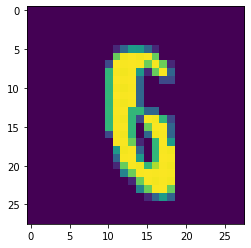

In [134]:
#wrongly predicted

store =[]

for i in range(0,len(Y_test)):
    if prediction_labels[i]!=Y_test[i]:
        store.append(i)
        

len(store)
index = random.randint(0,len(store))
index = store[index]

plt.imshow(X_test[index])
print('correct = {} , predicted = {}'.format(Y_test[index] , prediction_labels[index]))

